Testing the plotting mechanism


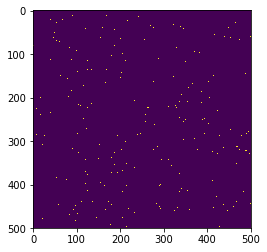

In [4]:
# Test and create a way to plot a numpy matrix or 2D array
import random
import math
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


def plot_matrix(mat):
    fig, ax = plt.subplots()
    h = ax.imshow(mat)
    plt.show()

def point_to_image_mat(mat, img_size=(500,500)):
    mat = np.array(mat).T
    x_max, x_min = mat[0].max(), mat[0].min()
    y_max, y_min = mat[1].max(), mat[1].min()
    x_rng, y_rng = x_max - x_min, y_max - y_min
    mul_factor_x = (img_size[0]-1)/x_rng
    mul_factor_y = (img_size[1]-1)/y_rng
    img = np.zeros(img_size)
    for x, y in mat.T:
        img[int((x - x_min)*mul_factor_x),int((y - y_min)*mul_factor_y)] = 1
    return img
    
def plot_points(mat, img_size=(500,500)):
    # This should take a matrix of shape (M, 2) where
    # M is the number of points. 
    # The values in mat could be anything, but gaurentee some shape
    # Therefore this function dictates the size of the image in pixels
    # TODO: zoom to remove low density areas
    plot_matrix(point_to_image_mat(mat, img_size))
    

M = 1000
hl = np.random.random(size=(M, 2))

# Test this
print("Testing the plotting mechanism")
plot_points(hl)

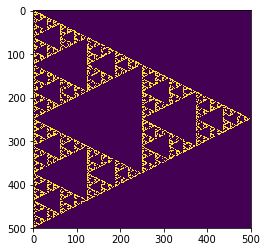

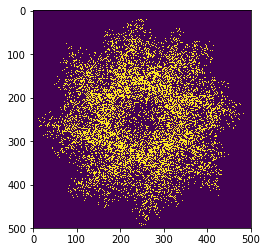

In [73]:
def instantiate_points(point_count):
    # Creates points on a unit circle of count pointCount
    # The radius of this circle is 1
    points = []
    for i in range(point_count):
        const = 2 * math.pi * i / point_count
        x, y = math.sin(const), math.cos(const)
        points.append([x,y])

    return points

def choices(conditionArray):
    pointCount = len(conditionArray)
    choice = random.randint(0, pointCount - 1)
    
    while True:
        for _ in range(100):
            # Loop until we find an index that has a true value in conditionArray
            potential_choice = random.randint(0, pointCount - 1)
            idx = (potential_choice - choice) % pointCount
            if not conditionArray[idx]:
                choice = potential_choice
                yield choice

def create_point(point, edge_point, scaling_factor=2):
    x, y = point
    _x, _y = edge_point
    return ((x + _x)/scaling_factor, (y + _y)/scaling_factor)

def fractal(iters=50000, dry_fire=1000, point_count=3, 
            scaling_factor=2, selection_limiter=None):
    
    if selection_limiter is None:
        selection_limiter = [False]*point_count
        
    if len(selection_limiter) != point_count:
        print("WARNING: your selection limiter ({}) doesn't match point count ({}).".format(len(selection_limiter), point_count))
        print("We will accomodate but be wary.")
        while len(selection_limiter) > point_count:
            selection_limiter.pop(-1)
        
        
    point = [random.uniform(-1,1), random.uniform(-1,1)]
    
    choice_gen = choices(selection_limiter)
    points_array = instantiate_points(point_count)
    choice = None
    mat = list(points_array)
    
    for i in range(iters):
        choice = next(choice_gen)
        point = create_point(point, points_array[choice], 
                             scaling_factor=scaling_factor)
        if i > dry_fire:
            mat.append(point)
    
    return mat

plot_points(fractal())
selection_limiter=[False, False, False, False, False, False, True, True]
plot_points(fractal(point_count=8, selection_limiter=selection_limiter)) 
images = []
for i in np.linspace(2,8,num=96):
    coordinates = fractal(point_count=8, selection_limiter=selection_limiter, scaling_factor=i)
    images.append(point_to_image_mat(coordinates))

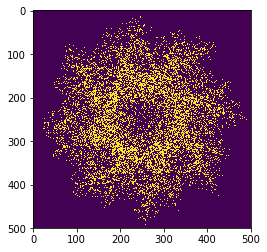

In [74]:
mat = images[0]
fig, ax = plt.subplots()
h = ax.imshow(mat)
fig.canvas.draw()
data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
data1 = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))    

132 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


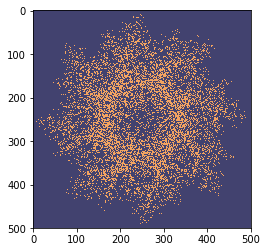

In [67]:
def mat_to_color(mat):
    colors = ((66, 66, 111), (244, 164, 96))
    nmat = np.array(list(map(lambda x: colors[int(x)], mat.ravel())), dtype=np.uint8)
    nmat = nmat.reshape(mat.shape + (3,))
    return nmat

mat = images[0]
fig, ax = plt.subplots()
h = ax.imshow(mat_to_color(mat))
%timeit mat_to_color(mat)

6.24 ms ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


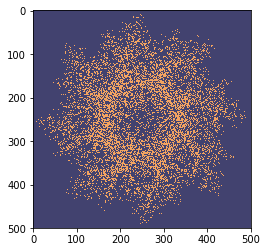

In [68]:
def mat_to_color(mat):
    colors = np.array(((66, 66, 111), (244, 164, 96)))
    index = np.digitize(mat.ravel(), [0,1], right=True)
    return colors[index].reshape(mat.shape + (3,)).astype(np.uint8)

mat = images[0]
fig, ax = plt.subplots()
h = ax.imshow(mat_to_color(mat))
%timeit mat_to_color(mat)

In [79]:
from moviepy.editor import VideoClip
from copy import deepcopy

gif_images = deepcopy(images)

def make_frame(t):
    """ returns a numpy array of the frame at time t """
    # ... here make a frame_for_time_t
    mat = gif_images.pop(0)
    data = mat_to_color(mat)   
    return data

clip = VideoClip(make_frame, duration=3) # 3-second clip
#clip.write_videofile("my_animation.mp4", fps=24) # export as video
clip.write_gif("my_animation.gif", fps=24) # export as GIF


[MoviePy] Building file my_animation.gif with imageio



 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 72/73 [00:01<00:00, 41.22it/s]